### Predicting using Tree based methods whether a customer will churn

In [1]:
#importing the libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

#### Lets do some EDA

In [4]:
df.isnull().sum() # checking whether there is any null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [6]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

### Lets take a look at the balance of class labels (churn) 

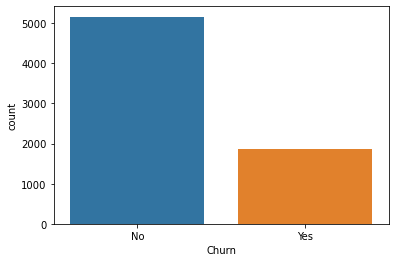

In [7]:
sns.countplot(data=df,x='Churn');

In [8]:
#OR
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

- Here the classes are imbalanced 
- But the imbalance is not too extreme and and well with in a 10:1 ratio
- so not doing a imabalance treatment

**Exploring the distribution total charges using box / violin plot**

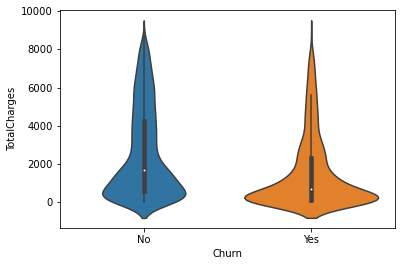

In [9]:
sns.violinplot(data=df,x="Churn",y='TotalCharges');

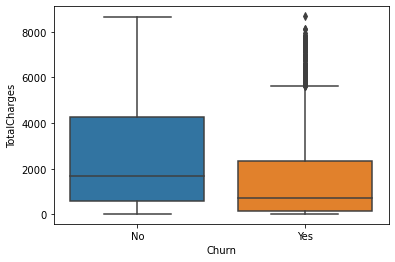

In [10]:
sns.boxplot(data=df,x="Churn",y='TotalCharges');

**Box plot showing distribution of TotalCharges per contract type with a hue based on classes**

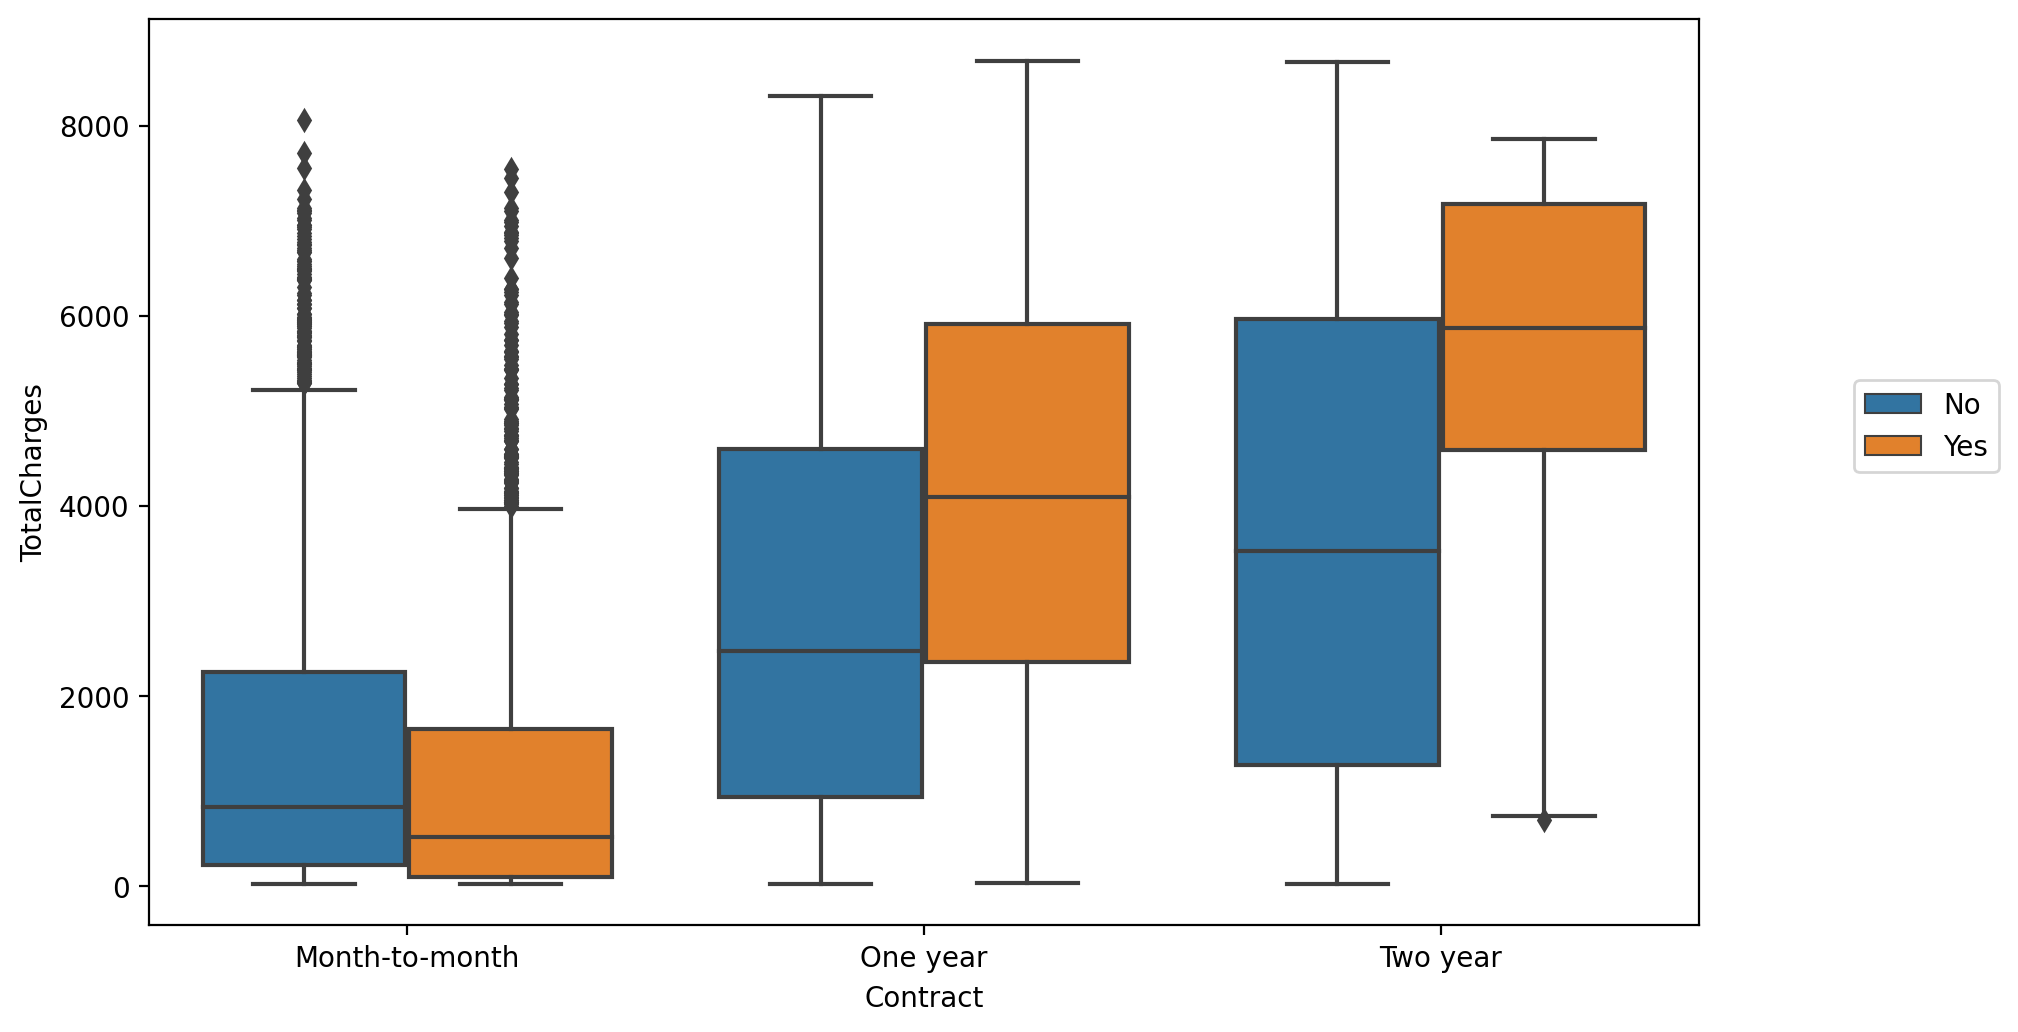

In [11]:
plt.figure(figsize=(10,6),dpi=200)
sns.boxplot(data=df,x="Contract",y='TotalCharges',hue='Churn')
plt.legend(loc=(1.1,0.5));

**Things we interpret from this plot**

- The month to month data seems to be very similar and it may because the one who subscribes for these kinda plans do not wish to be in the service for a long run so their median price is is lower
- The one year and two year plans seems to be telling that a customer is more likely to use the service if the total charge is low as we can see that the people who have churned in the 1 and 2 year plots seems to have a higher price.
- That is if we can keep that customer for a long run we can make more money by introducing some coupon programmes to reduce the price.

**Churn meaning in telecom means switching of network**

### Lets encode some of the categoricals to get correlation

In [12]:
corr_df = pd.get_dummies(df[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity'
                  ,'OnlineBackup','DeviceProtection','TechSupport','InternetService','StreamingTV','StreamingMovies',
                 'Contract','PaperlessBilling','PaymentMethod','Churn']]).corr()

In [13]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

In [14]:
corr_yes_churn=corr_df['Churn_Yes'].sort_values().iloc[1:-1]

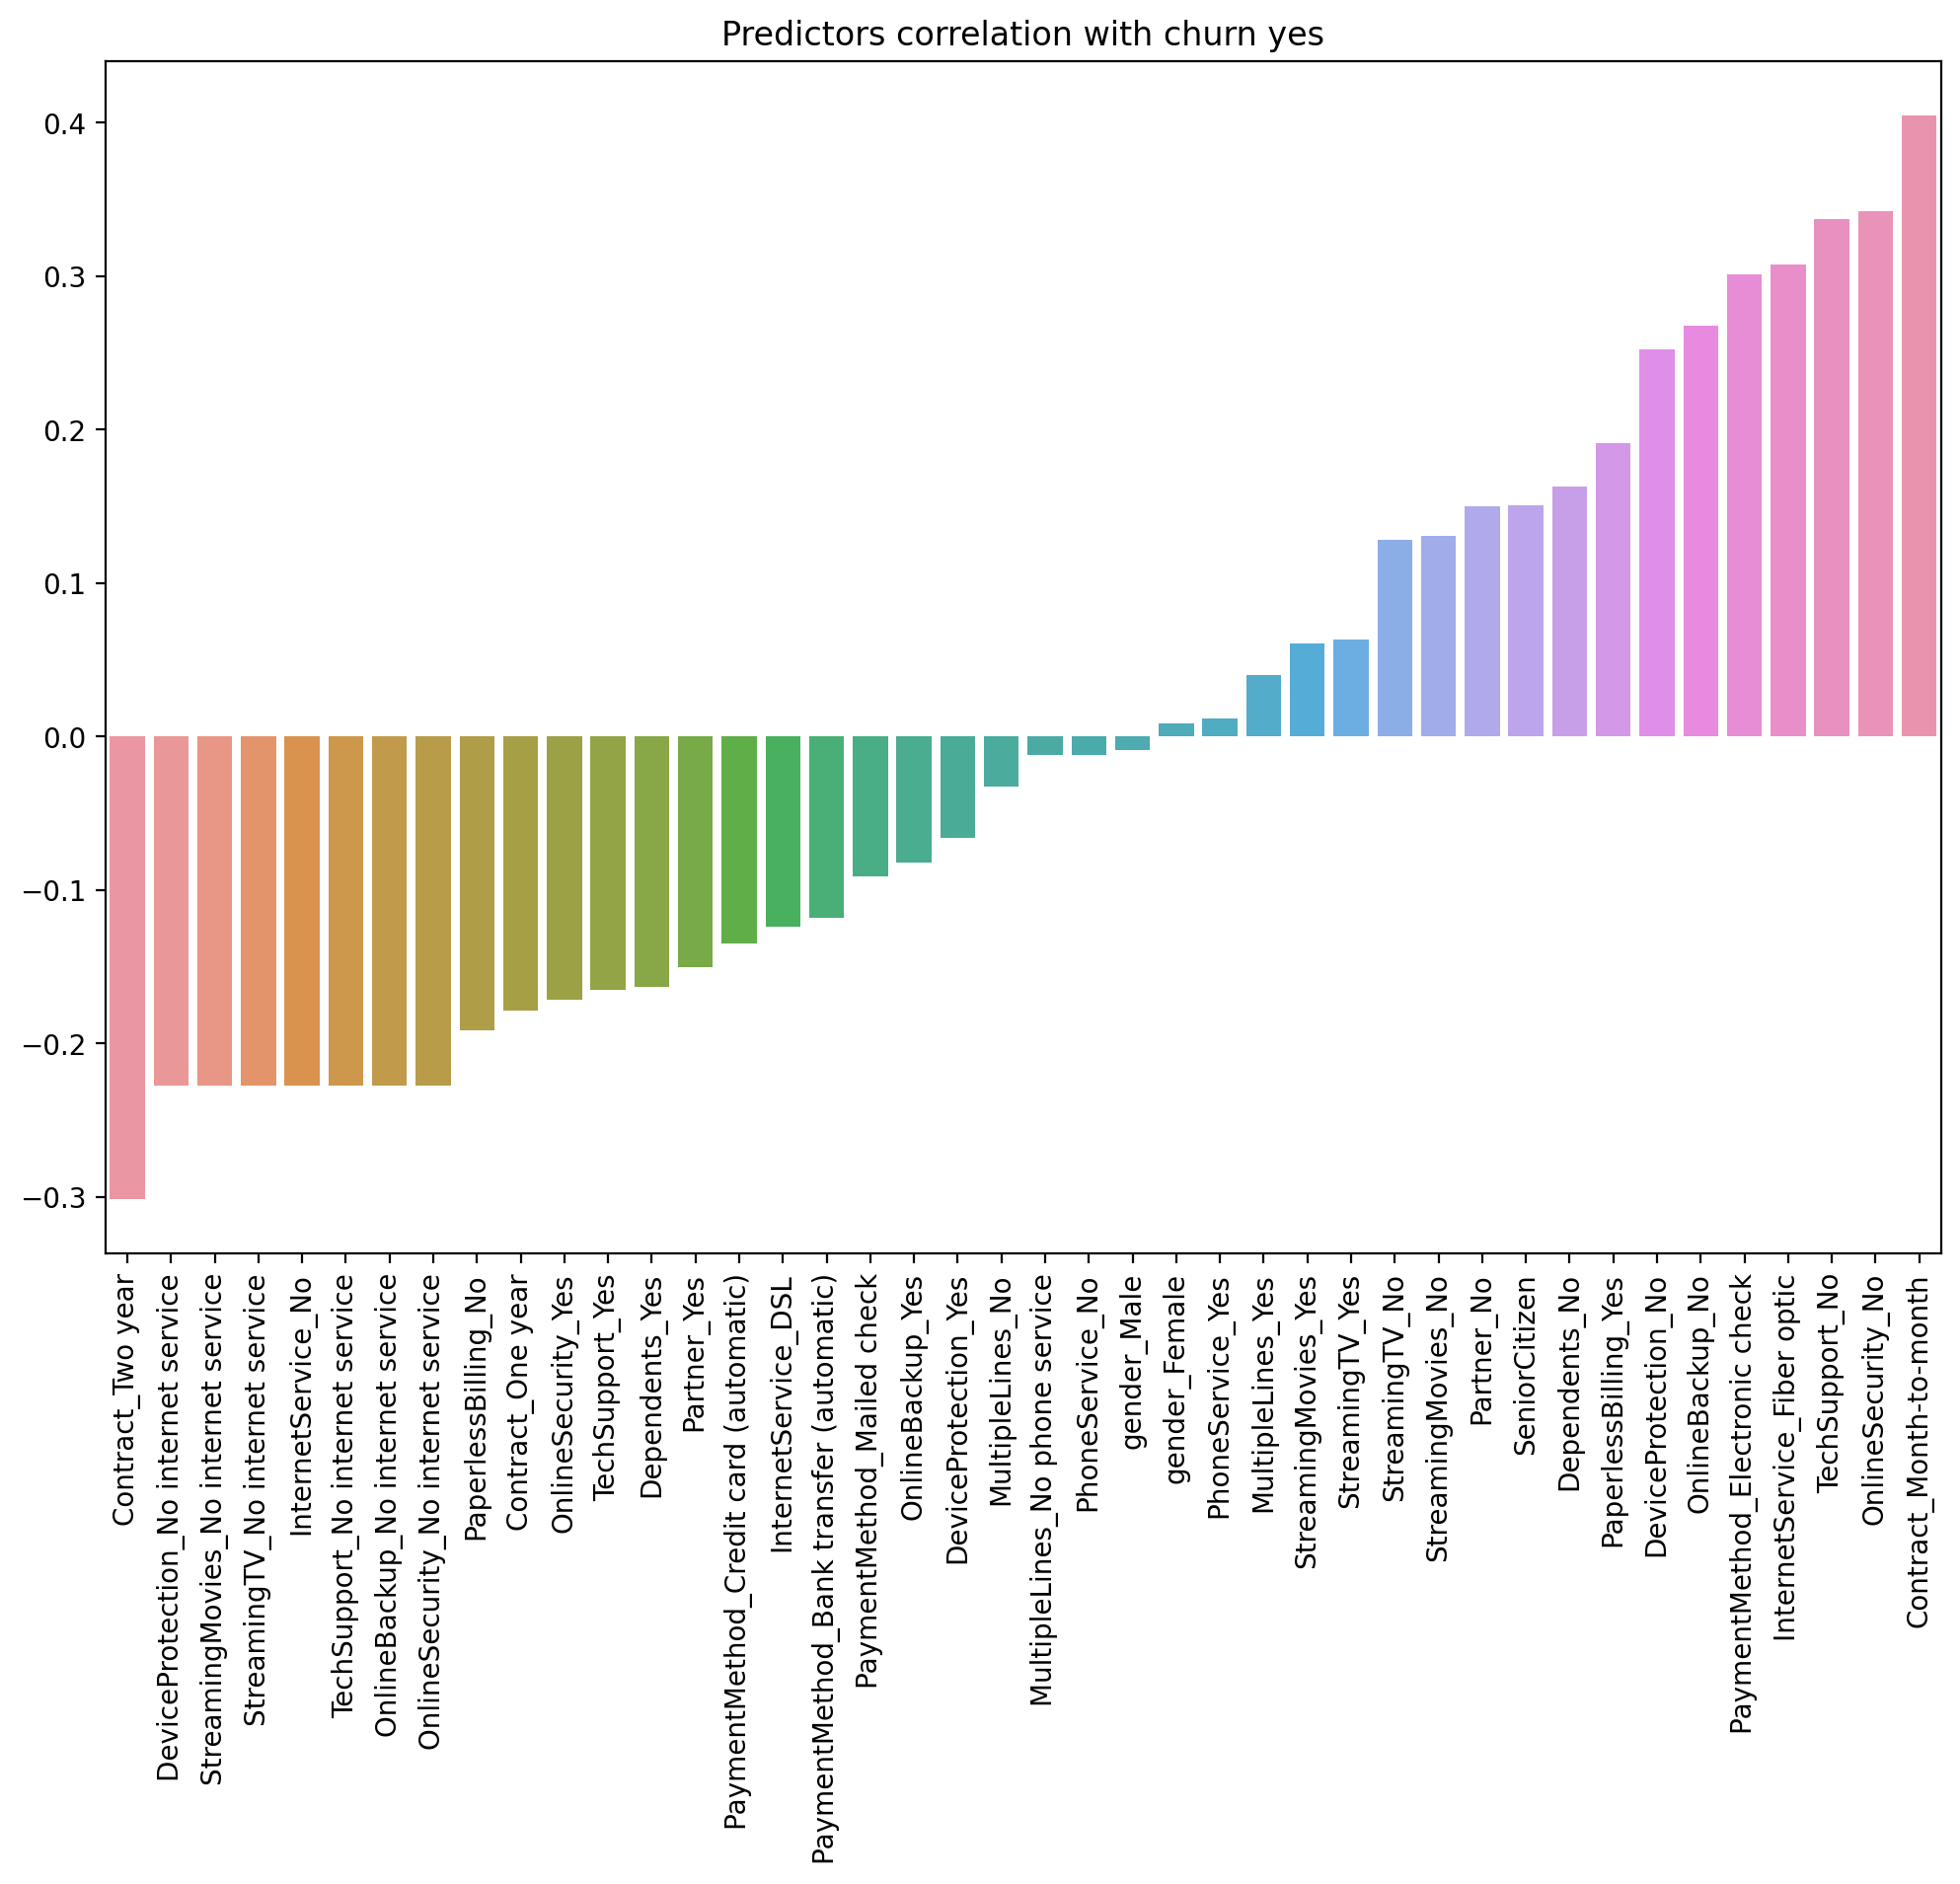

In [15]:
plt.figure(figsize=(12,8),dpi=200)
plt.title("Predictors correlation with churn yes")
sns.barplot(x=corr_yes_churn.index,y=corr_yes_churn.values)
plt.xticks(rotation=90);

### Lets segment users based on their characteristics

In [16]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [17]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39])

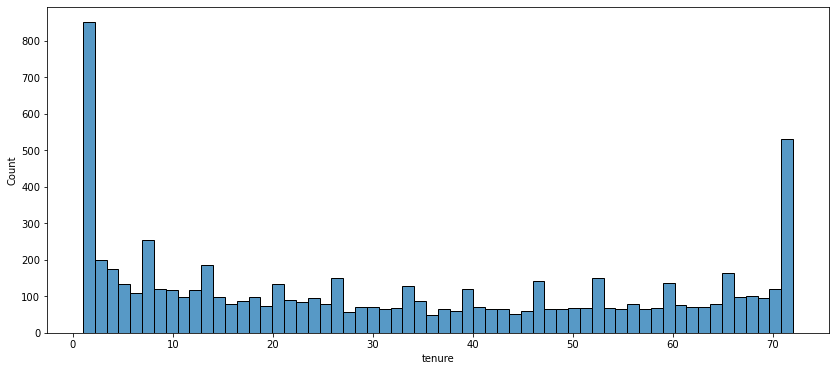

In [18]:
plt.figure(figsize=(14,6))
sns.histplot(data=df,x='tenure',bins=60);

### Observations from above hist plot
1. we have a high number of people with very low tenure like 2 or 3 months
2. The second largest number are the super long term like near 70 months or so.. Basically the people in love with the service provider.


### Creating a histogram plot for each tenure separately with Churn =yes and no

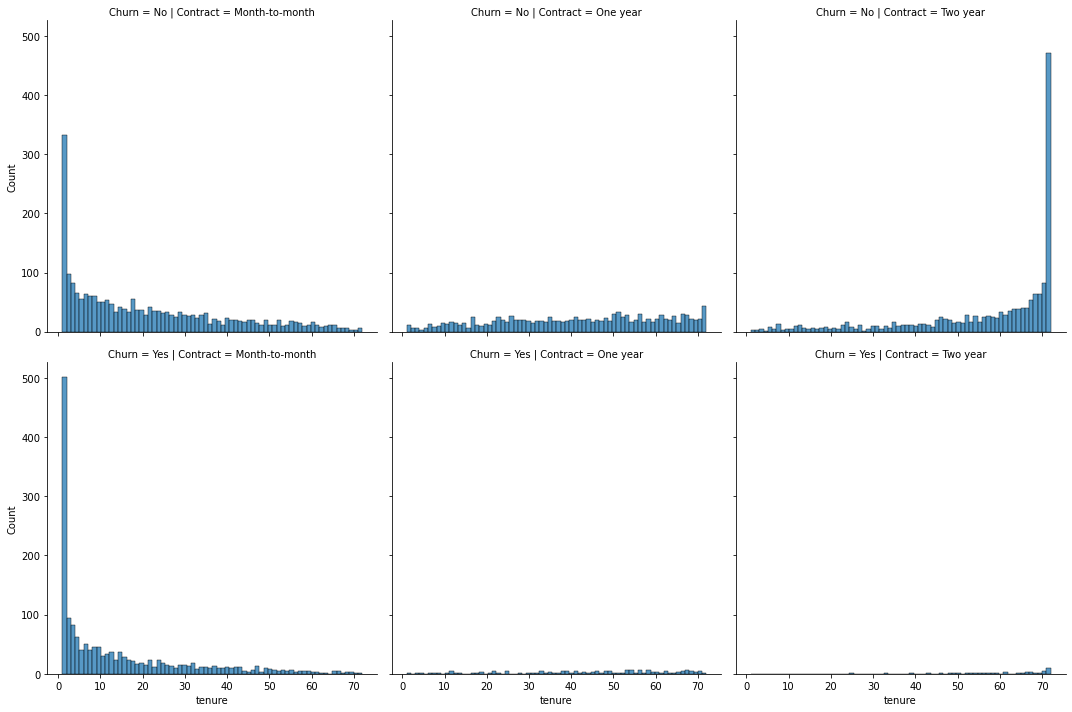

In [19]:
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn')

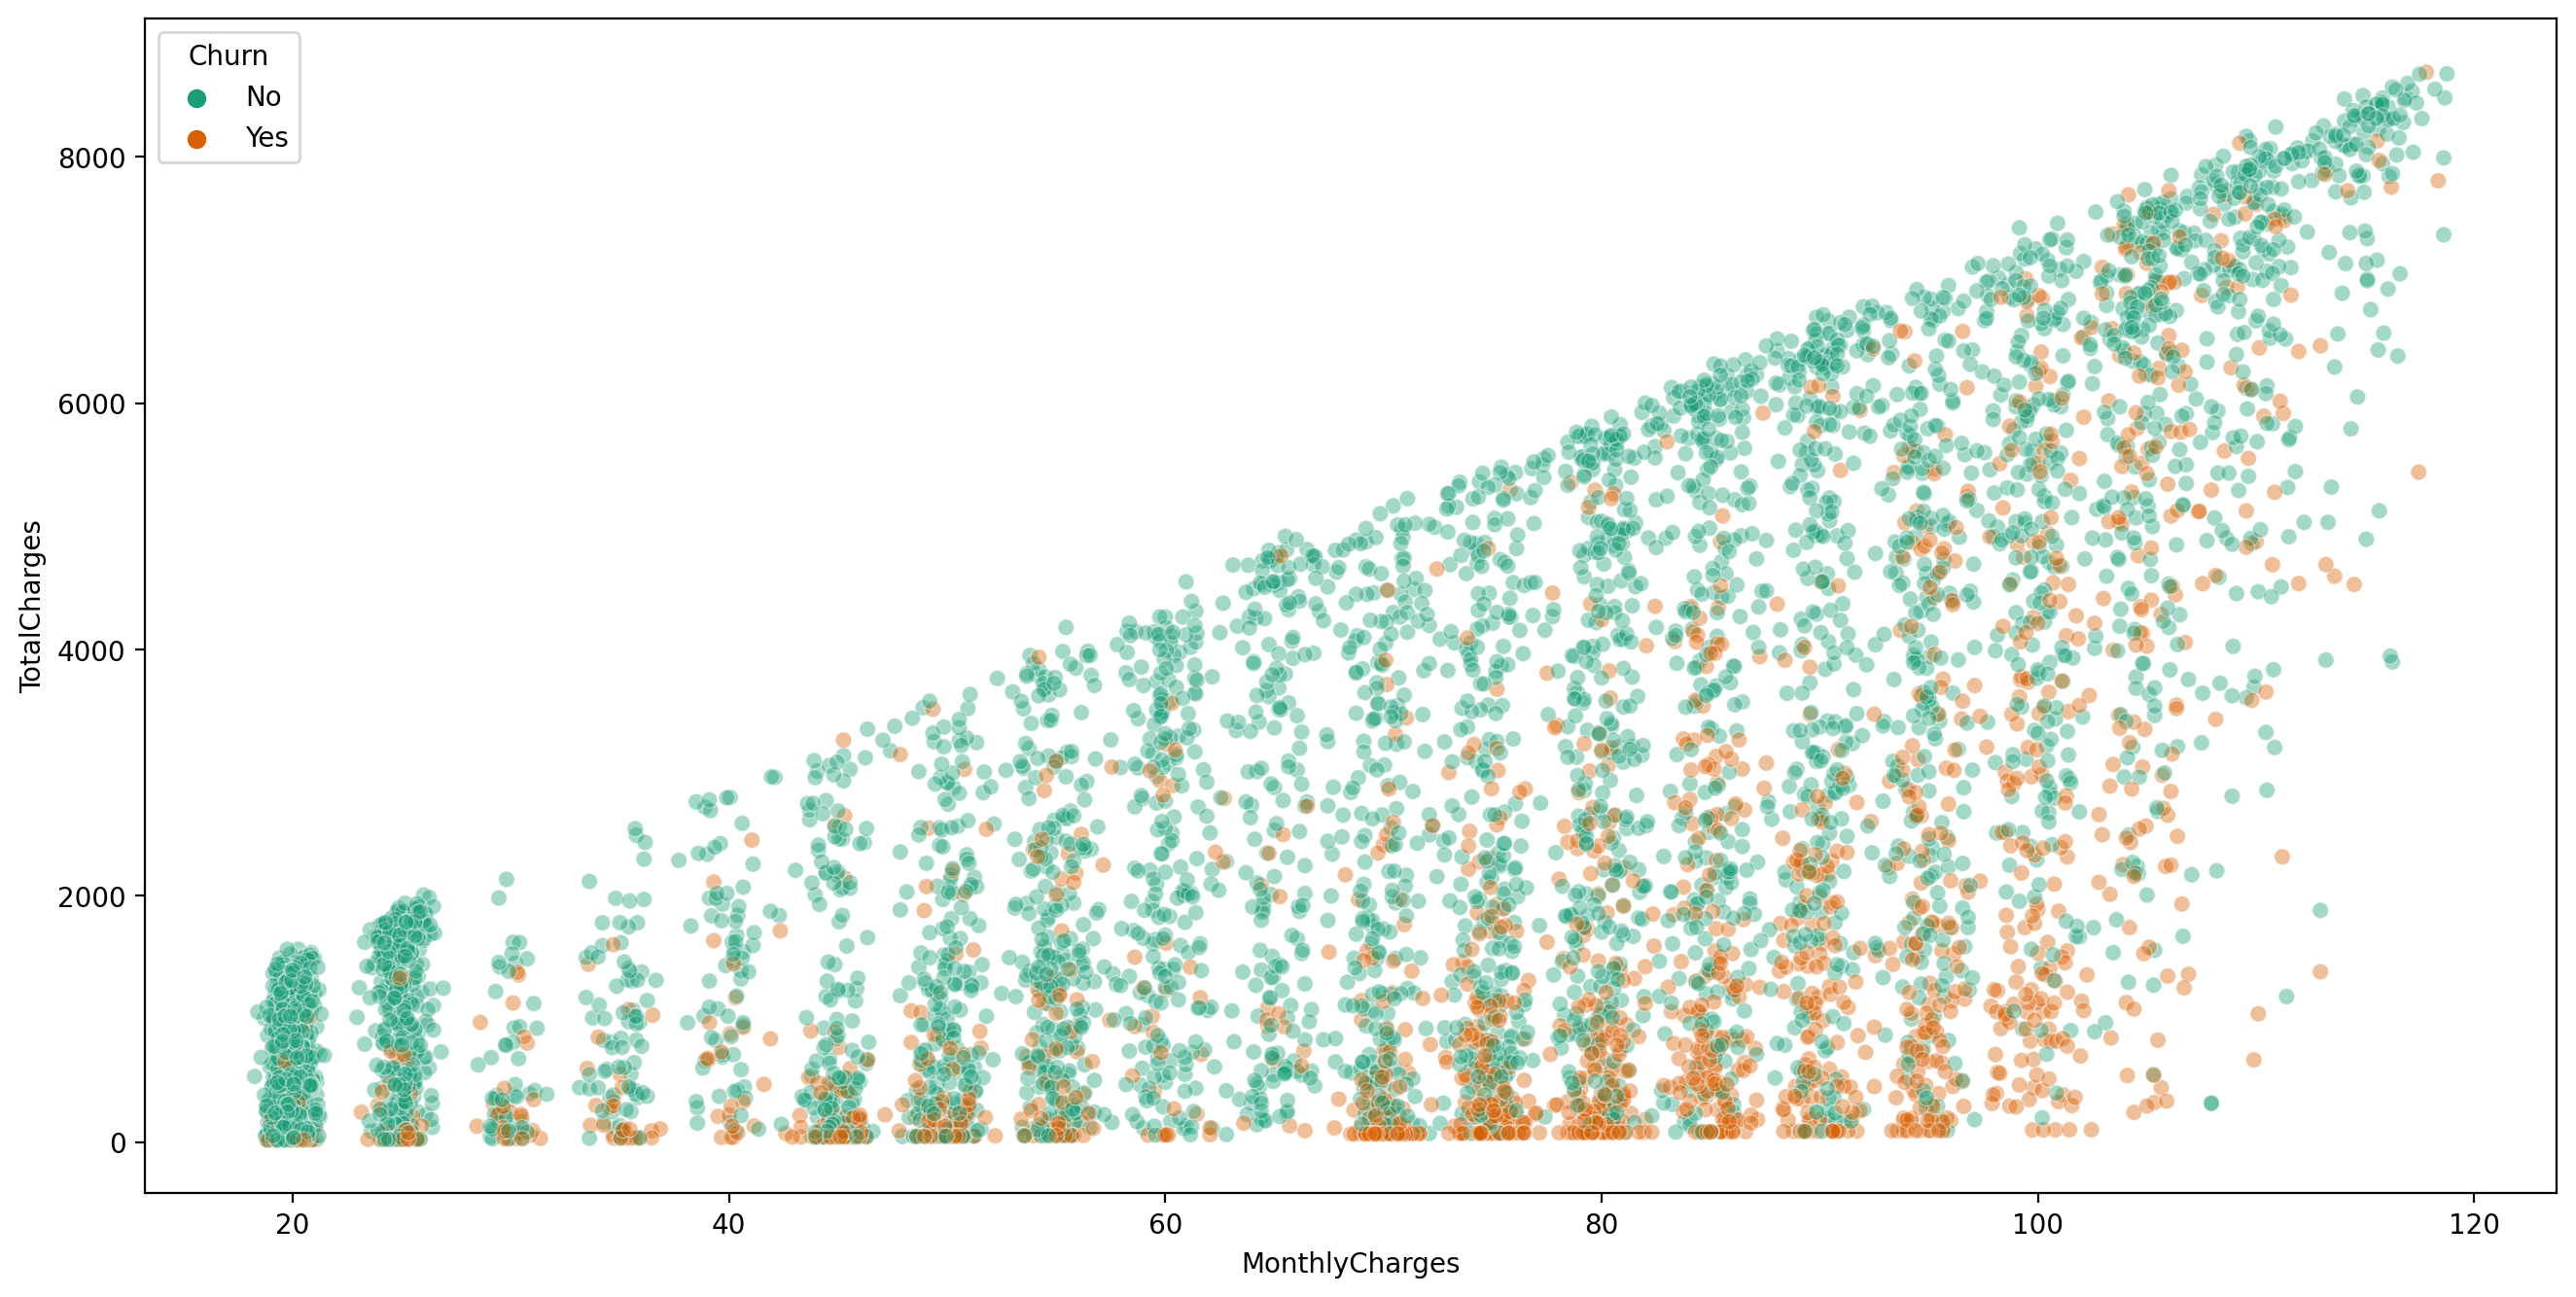

In [20]:
plt.figure(figsize=(16,8),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue="Churn",alpha=0.4,linewidth=0.5,
               palette='Dark2');

**Lets do a plot with % churn with duration**

In [21]:
yes_churn =  df.groupby(['Churn','tenure']).count().T['Yes']

In [22]:
no_churn = df.groupby(['Churn','tenure']).count().T['No']

In [23]:
churn_rate = (100*yes_churn/(no_churn+yes_churn)).T

<AxesSubplot:xlabel='tenure'>

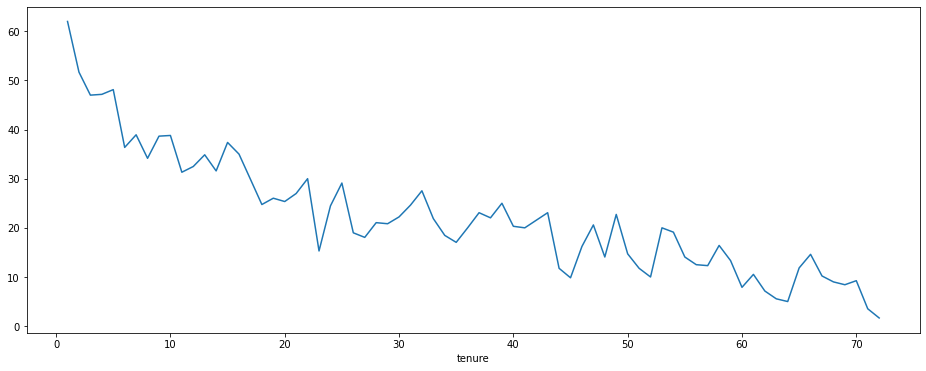

In [24]:
plt.figure(figsize=(16,6))
churn_rate['customerID'].plot()

**Creating separate colum for tenure ranges of**

- 0-12 months
- 12 -14 months
- 24- 48 months
- Over 48 months

In [25]:
def cohort(tenure):
    if tenure<13:
        return '0-12 Months'
    elif tenure<25:
        return '12-24 Months'
    elif tenure<49:
        return '12-24 Months'
    else:
        return 'Over 48 Months'

In [26]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [27]:
df[['Tenure Cohort','tenure']]

Tenure Cohort  tenure
0        0-12 Months       1
1       12-24 Months      34
2        0-12 Months       2
3       12-24 Months      45
4        0-12 Months       2
...              ...     ...
7027    12-24 Months      24
7028  Over 48 Months      72
7029     0-12 Months      11
7030     0-12 Months       4
7031  Over 48 Months      66

[7032 rows x 2 columns]

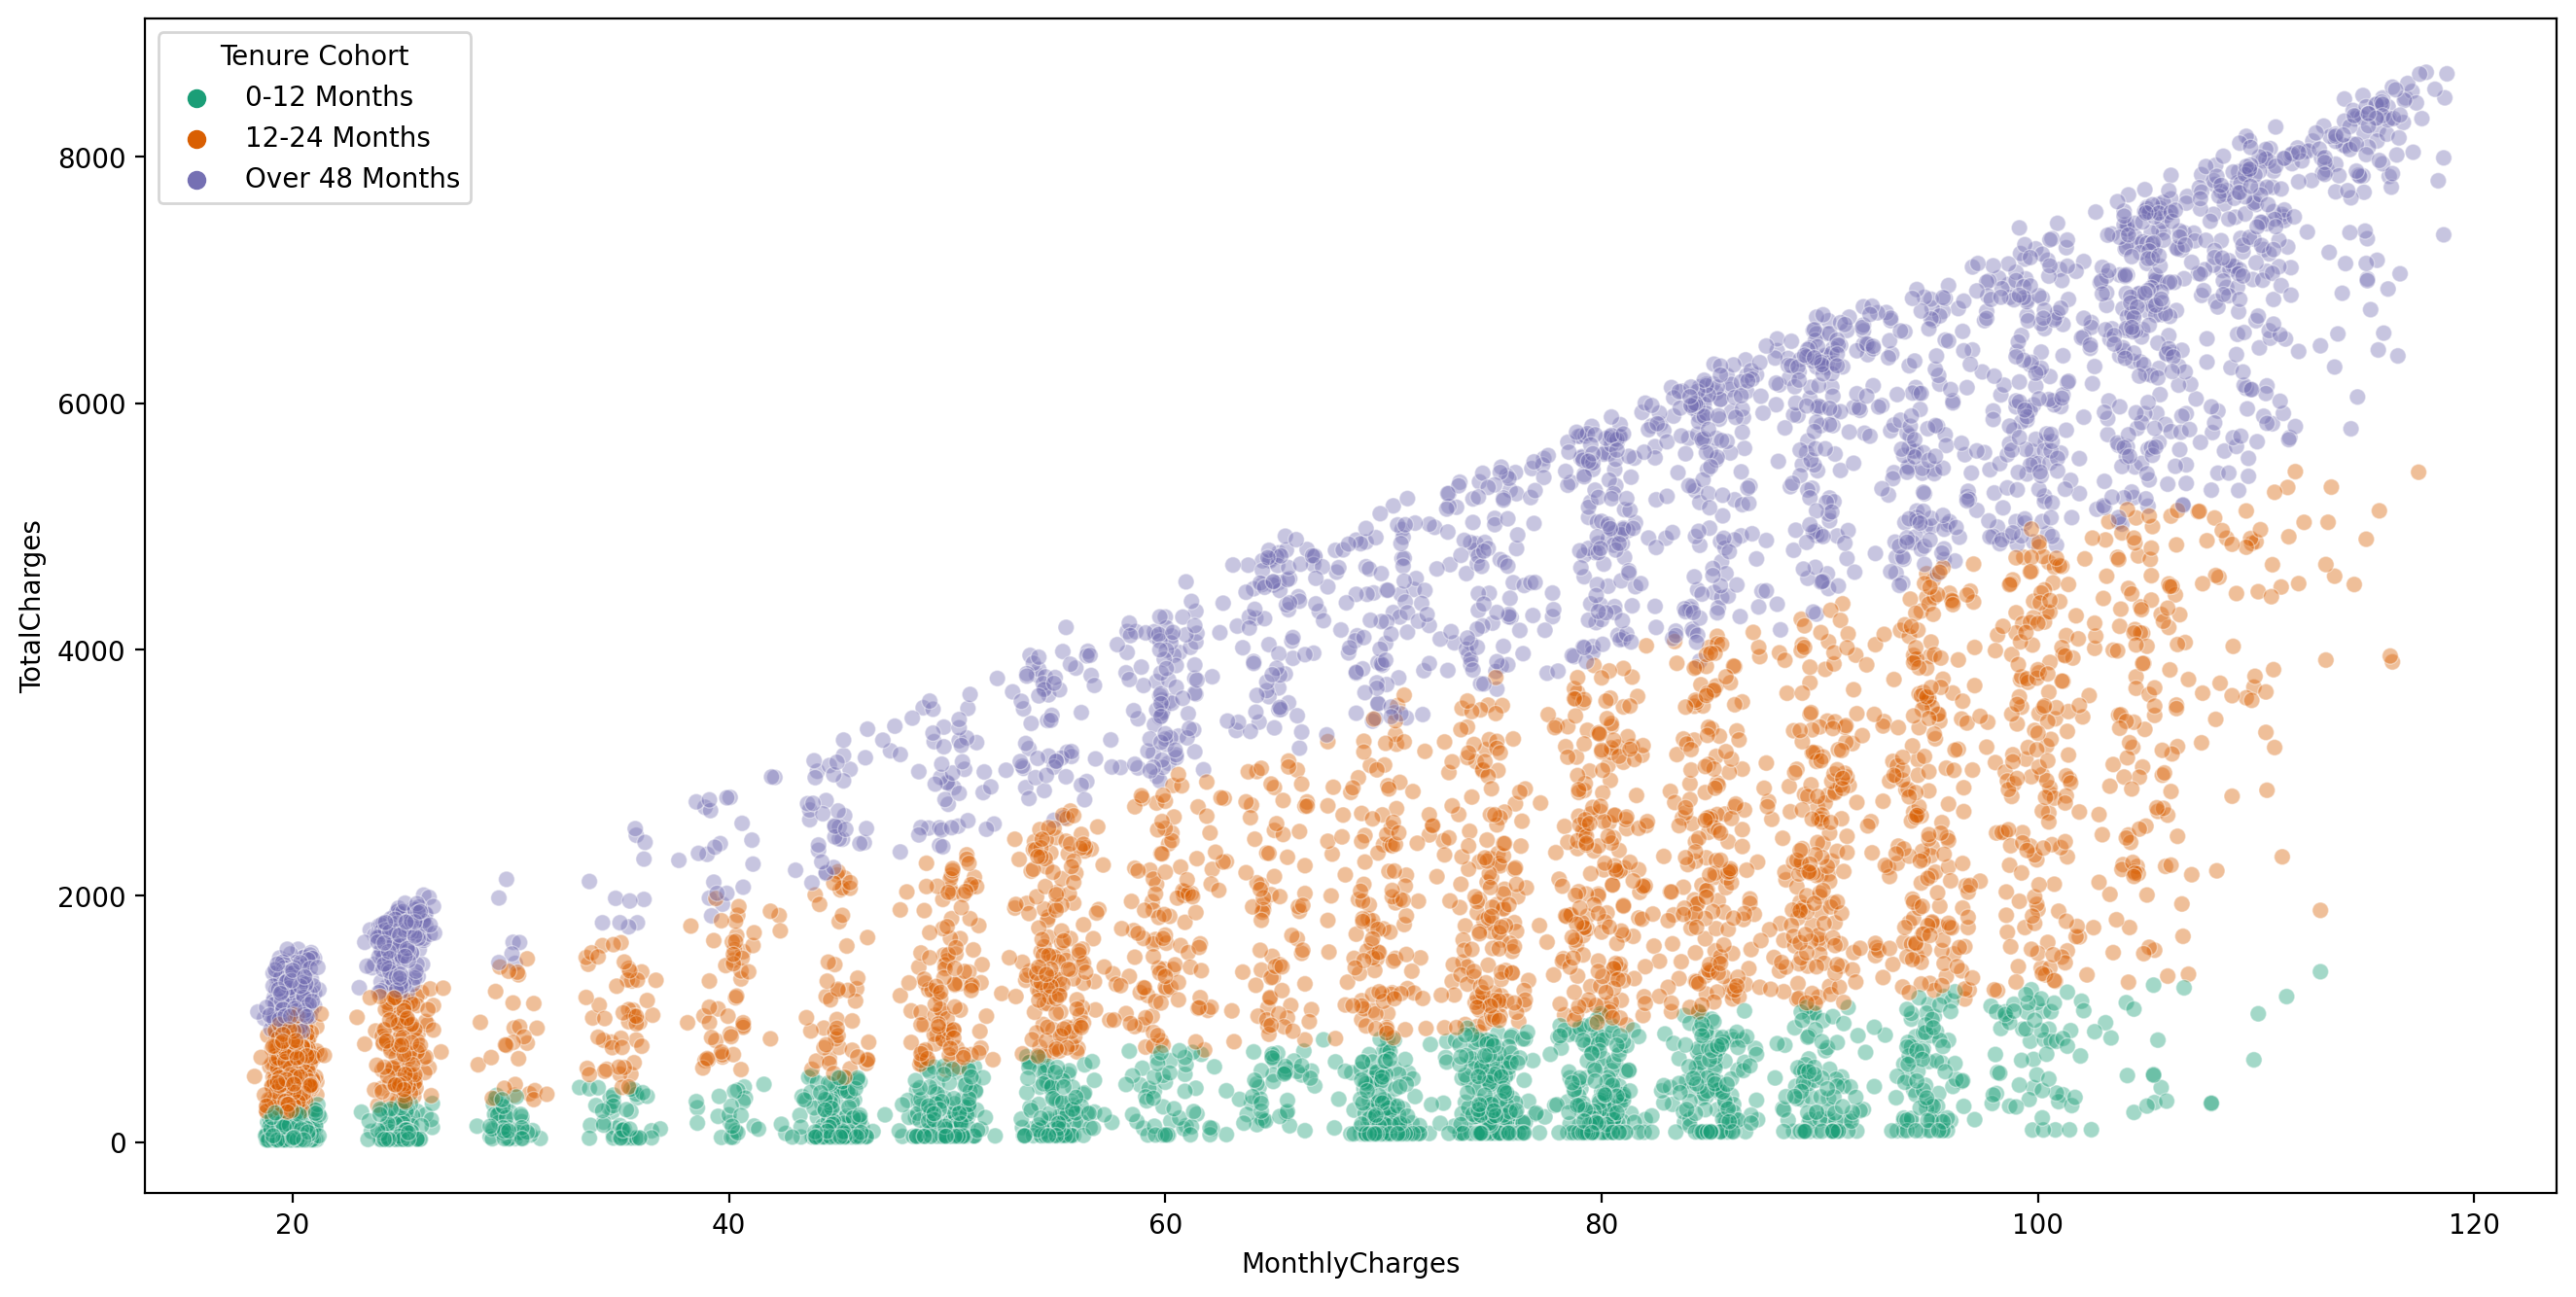

In [28]:
plt.figure(figsize=(16,8),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue="Tenure Cohort",alpha=0.4,linewidth=0.5,
               palette='Dark2');

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

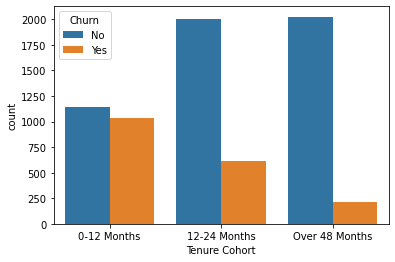

In [29]:
sns.countplot(data=df, x='Tenure Cohort',hue='Churn')

Again showing that the people who stay longer will continue using the service and people who stay for within a year are likely to switch

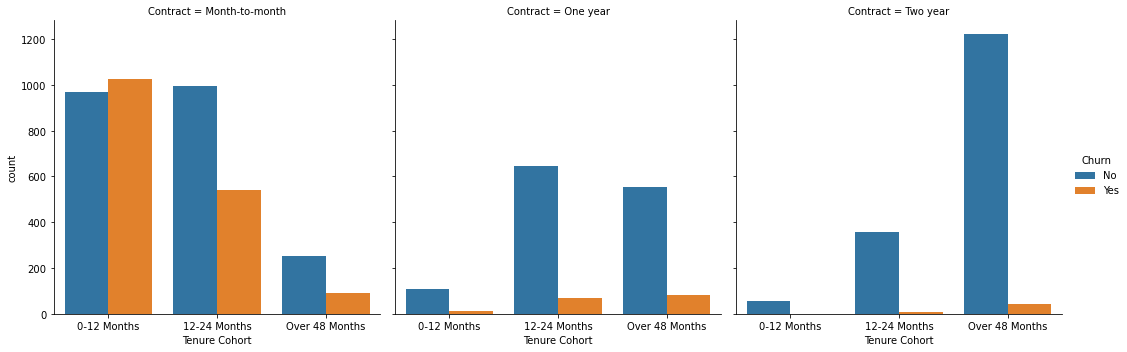

In [30]:
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',kind='count',col='Contract')

## Single Decision Tree

Separating data into predictors and target. Creating dummy variables where necessary and note which features are not needed.

In [31]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... TechSupport  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...         Yes   
4                No     Fiber optic             No  ...          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges  Churn  Tenure Cohort  
0           Electronic check          29.85        29.85     No    0-12 Months  
1               Mailed check          56.95      1889.50     No   12-24 Months  
2               Mailed check          53.85       108.15    Yes    0-12 Months  
3  Bank transfer (automatic)          42.30      1840.75     No   12-24 Months  
4           Electronic check          70.70       151.65    Yes    0-12 Months  

[5 rows x 22 columns]

definetly we do not want to encode customerID as it will create 7000+ extra features and donot hold any information as well. Also we can drop churn col.

In [32]:
X=df.drop(['customerID','Churn'],axis=1)

In [33]:
X=pd.get_dummies(X,drop_first=True)

In [34]:
y=df['Churn']

### train test and split with 10% as testing part

In [35]:
from sklearn.model_selection import train_test_split


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

### implementing the tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dt=DecisionTreeClassifier(max_depth=6)

In [39]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [40]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [41]:
preds = dt.predict(X_test)

In [42]:
print(classification_report(y_test,preds)) # seems like precision is more inclined to "No"s

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



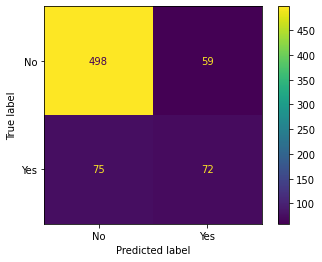

In [43]:
plot_confusion_matrix(dt,X_test,y_test);

In [44]:
dt.feature_importances_

array([0.01082504, 0.42391407, 0.0441482 , 0.06613492, 0.00123697,
       0.        , 0.        , 0.        , 0.00785158, 0.01243191,
       0.31406016, 0.        , 0.        , 0.00837585, 0.        ,
       0.00534132, 0.        , 0.        , 0.        , 0.00786752,
       0.        , 0.        , 0.02628952, 0.        , 0.01002118,
       0.02706543, 0.        , 0.        , 0.03443632, 0.        ,
       0.        , 0.        ])

THe above gives just raw values which is not so friendly for findng the feature

In [45]:
imp_feats = pd.DataFrame(data=dt.feature_importances_,index=X.columns,columns=['Feature Importances'])

In [46]:
imp_feats

Feature Importances
SeniorCitizen                                     0.010825
tenure                                            0.423914
MonthlyCharges                                    0.044148
TotalCharges                                      0.066135
gender_Male                                       0.001237
Partner_Yes                                       0.000000
Dependents_Yes                                    0.000000
PhoneService_Yes                                  0.000000
MultipleLines_No phone service                    0.007852
MultipleLines_Yes                                 0.012432
InternetService_Fiber optic                       0.314060
InternetService_No                                0.000000
OnlineSecurity_No internet service                0.000000
OnlineSecurity_Yes                                0.008376
OnlineBackup_No internet service                  0.000000
OnlineBackup_Yes                                  0.005341
DeviceProtection_No internet service              0.000000
DeviceProtection_Yes                              0.000000
TechSupport_No internet service                   0.000000
TechSupport_Yes                                   0.007868
StreamingTV_No internet service                   0.000000
StreamingTV_Yes                                   0.000000
StreamingMovies_No internet service               0.026290
StreamingMovies_Yes                               0.000000
Contract_One year                                 0.010021
Contract_Two year                                 0.027065
PaperlessBilling_Yes                              0.000000
PaymentMethod_Credit card (automatic)             0.000000
PaymentMethod_Electronic check                    0.034436
PaymentMethod_Mailed check                        0.000000
Tenure Cohort_12-24 Months                        0.000000
Tenure Cohort_Over 48 Months                      0.000000

In [47]:
imp_feats = imp_feats.sort_values('Feature Importances')

In [48]:
imp_feats = imp_feats[imp_feats['Feature Importances']>0]

plt.figure(figsize=(8,6),dpi=100)
sns.barplot(data=imp_feats, x=imp_feats.index,y='Feature Importances')
plt.xticks(rotation=90);

## lets plot the tree

In [50]:
from sklearn.tree import plot_tree

In [51]:
#plot_tree(dt) # is huge horizontally

## Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier(max_depth=6)

In [58]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6)

In [59]:
preds = rf.predict(X_test)

In [60]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.87      0.92      0.89       557
         Yes       0.61      0.46      0.52       147

    accuracy                           0.83       704
   macro avg       0.74      0.69      0.71       704
weighted avg       0.81      0.83      0.82       704



    Not performing better than the DT likely bcz the RF is going deep and creating an overfit. so lets tweak the parameters of RF with max_dpth of 6 first

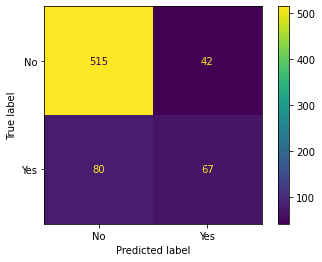

In [61]:
plot_confusion_matrix(rf,X_test,y_test)

1. the 75 from the single DT now became 80 So the RF is performing much worse than a single DT.
2.We might need grid search 

## boosted trees(Ada)

In [62]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [63]:
ada_model = AdaBoostClassifier()

In [64]:
gb_model= GradientBoostingClassifier()

In [65]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier()

In [66]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [67]:
ada_preds = ada_model.predict(X_test)

In [68]:
gb_pred = gb_model.predict(X_test)

In [70]:
print(classification_report(y_test,ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



In [71]:
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



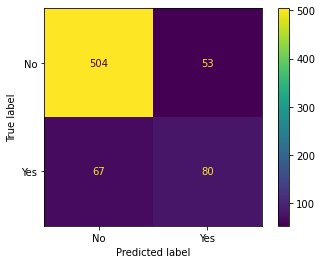

In [72]:
plot_confusion_matrix(ada_model,X_test,y_test)

1. We have the recall some what reduced and even increasing the estimators in ada to 100 the recall is staying around the same range.
2. This must be likely bcz of the imbalance class